In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

from data import test_data
import example_graphs as ex
import cluster_refinement as refinement

In [2]:
def draw(G):
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black')
    plt.title(f"{G}")
    plt.show()

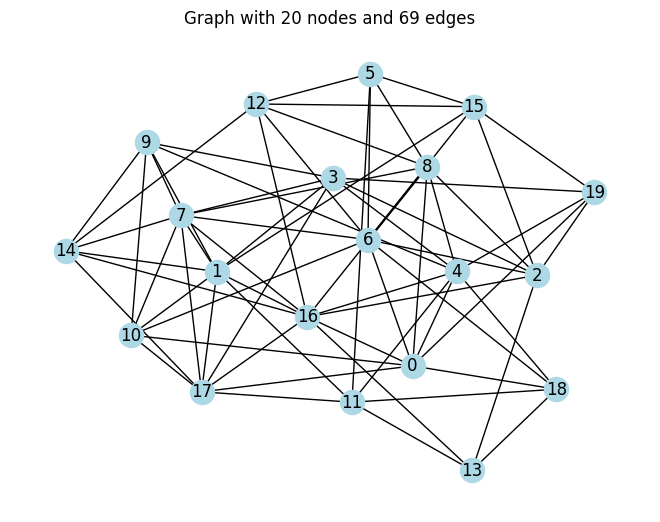

In [3]:
G = ex.test_graph(20)
draw(G)

In [11]:
def aggressive_pruning(G, threshold=2):
    H = G.copy()
    n = G.number_of_nodes()
    candidates = deque(list(H.edges()))
    while candidates:
        u, v = candidates.popleft()
        if not H.has_edge(u, v): #remove if edge doesn't exist anymore
            continue
        if H.degree(u) + H.degree(v) < n + threshold:
            continue
        else:
            H.remove_edge(u, v)
            #print(f"removing edge {u}-{v}")
            #draw(H)
            for w in list(H.neighbors(u)):
                candidates.append((u, w))
            for w in list(H.neighbors(v)):
                candidates.append((v, w))
    
    #plt.show()
    return H

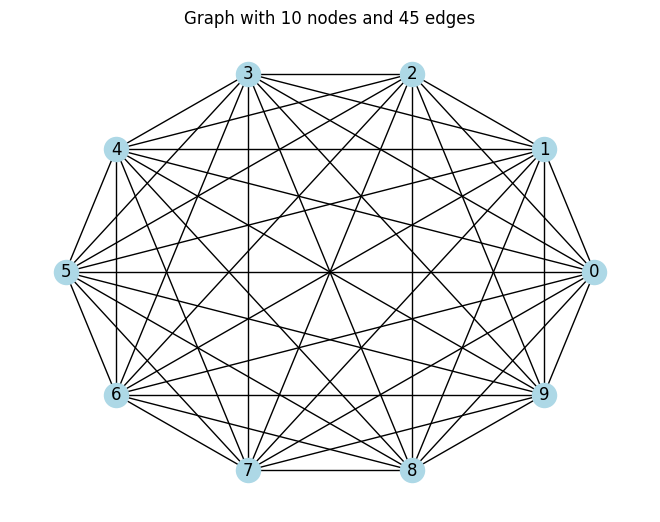

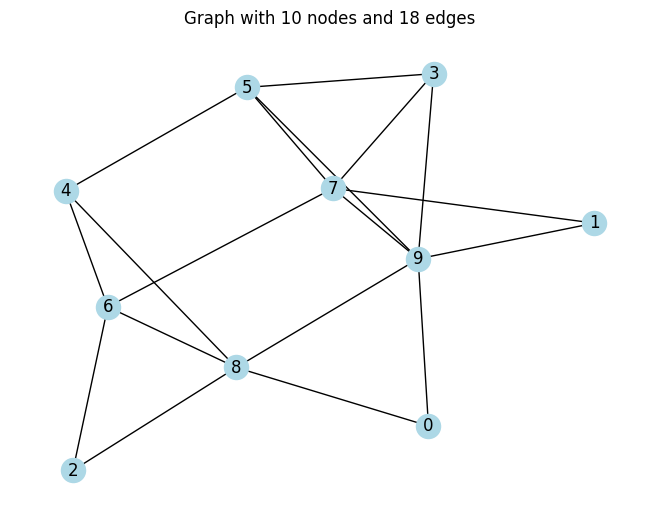

In [13]:
n=10
G = nx.complete_graph(n)
draw(G)
pruned = aggressive_pruning(G)
draw(pruned)

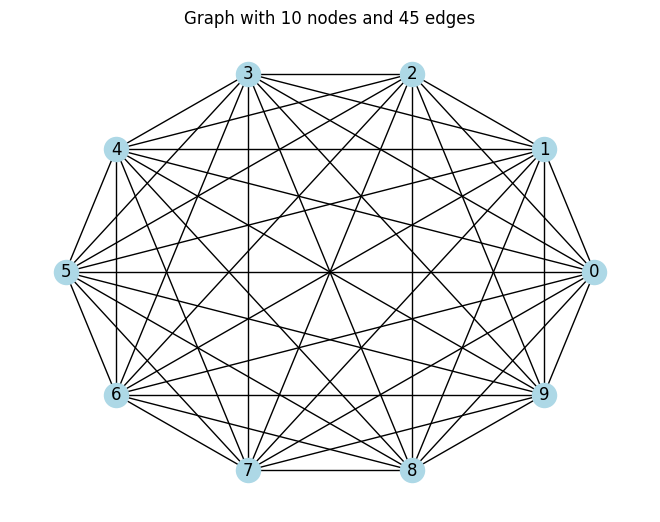

In [14]:
cl = refinement.bondy_chvatal_closure(pruned)
draw(cl)